In [1]:
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;
alpha = .3
zipinVersion = 'Feng'
zipin= brdf.ZipinBrdf(alpha, alpha, zipinVersion);
theta_o = math.pi /3;
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o));
u = (.5, .5)
#wo = vec3.Vec3(random.uniform(0,1), random.uniform(0, 1), random.uniform(0, 1));
#u = (random.uniform(0,1), random.uniform(0, 1));
print(wo, u)
zsample =zipin.Sample(wo, u);
if zsample[0]>0:
    zeval = zipin.Eval(wo, zsample[2]);
    print(zsample[2])
    print(zeval, zsample);

beckman = brdf.Brdf(alpha, alpha);
bsample = beckman.Sample(wo, u);
if bsample[0]>0:
    beval = beckman.Eval(wo, bsample[2]);
    print(bsample[2]);
    print(beval, bsample);

zipinVersion:  Feng
Vec3(0, 0.8660254037844386, 0.5000000000000001) (0.5, 0.5)
Vec3(-0.9994192913487604, 1.2239356361563754e-16, 0.03407462516215794)
(0.28311521855868743, 0.25883246540655724) (0.28311521855868754, 0.28311521855868754, <vec3.Vec3 object at 0x1057e1be0>, <vec3.Vec3 object at 0x1057e1ba8>)
Vec3(-0.23510007732975968, -0.8660254037844386, 0.4412799039606734)
(0.9979529196086191, 0.9979529196086191) (0.9979529196086167, 0.9979529196086167, <vec3.Vec3 object at 0x1057e1d68>)


zipinVersion:  Feng


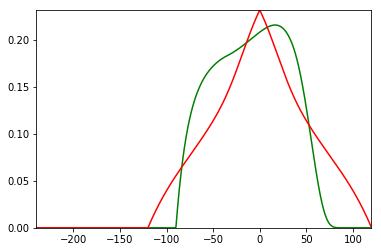

In [2]:
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;

#critical value of alpha when the beckman starts to have double peak
alpha = .9

zipinVersion = 'Feng'
beckman = brdf.Brdf(alpha, alpha);
zipin= brdf.ZipinBrdf(alpha, alpha,  zipinVersion);
theta_o = math.pi /3;
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o))
xdata= [];              
zdata=[]; 
bdata = [];
zsamples = []
bsamples = []
sampleCount = 1000
minAngle = -theta_o - math.pi  
maxAngle = minAngle + math.pi *2.0

rangeAngle = maxAngle - minAngle
maxBounce = 5
for i in range(1,sampleCount):
    thetaWi = minAngle + rangeAngle * float(i)/float(sampleCount) 
    mu = math.cos(thetaWi)
    #mu = i/sampleCount
    wi = vec3.Vec3(0, math.sin(thetaWi), mu)
    beval = beckman.Eval(wo, wi, False)
    zeval = zipin.Eval(wo, wi, maxBounce)
    bsamples.append(beval) 
    zsamples.append(zeval)
    xdata.append(math.degrees(thetaWi))
    bdata.append(beval[0])
    zdata.append(zeval[0])

plt.plot(xdata, bdata, color = 'green');
plt.plot(xdata, zdata, color = 'red');
plt.autoscale(True, 'both', True)
plt.show()  



In [ ]:
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;

In [9]:
alpha = .3
beckman = brdf.Brdf(alpha, alpha);
theta_o = math.pi /3;
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o));
bsample = beckman.Sample(wo, u);


In [12]:
print(bsample[2]);
wi = bsample[2]

Vec3(-0.23510007732975968, -0.8660254037844386, 0.4412799039606734)


In [11]:
print(bsample);

(0.9979529196086167, 0.9979529196086167, <vec3.Vec3 object at 0x10e7a7ac8>)


In [13]:
wh = (wo + wi).norm()

In [14]:
print(wh);

Vec3(-0.24232229785830012, 0.0, 0.970195807020765)


In [15]:
bvNoG = beckman.MicrofacetValue(wo, wi, wh, True);
print(bvNoG);

0.9979529196086191


In [17]:
D = beckman.microfacet.D(wh);
print(D);

1.9959058392172386


In [18]:
mpdf = beckman.microfacet.Pdf(wh);
print(mpdf);

1.936419476416826


In [19]:
testMV = D/(4.0 * wo.z);
testMP = mpdf/(4.0 * vec3.dot(wo, wh));
print(testMV, testMP);


0.9979529196086191 0.9979529196086191


In [20]:
oh = vec3.dot(wo, wh);
print(wo.z, oh);

0.5000000000000001 0.4850979035103826


In [21]:
g = beckman.microfacet.G(wo, wi, wh);
print(g);

1
